# Ph 21 Assignment 4b

## Part I

For this assignment we will be using emcee to apply MCMC sampling to the problems from last time. Let's start out with the coin flip.

In [125]:
import emcee

For review the relevant equations for a coin toss are:

$$prob(X|D,I)=\frac{prob(D|X,I)*prob(X|I)}{Prob(D|I)}$$ 

$$posterior=\frac{(likelyhood)(prior)}{(evidence)}$$

$$prob(D|H,I)=\frac{n!}{h!(n-h)!}H^h(1-H)^{n-h}$$

For MCMC sampling we want the log of the likelyhood:

$$log(\frac{n!}{h!(n-h)!}H^h(1-H)^{n-h}) = log(n!)-log(h!(n-h)!)+hlog(H)+(n-h)log(1-H)$$

In [126]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
from numpy import *

In [3]:
def lnpost(H,n,h):
    if 0 < H < 1:
        lnp = np.log(np.math.factorial(n))-np.log(np.math.factorial(h))\
        -np.log(np.math.factorial(n-h))+h*np.log(H)+(n-h)*np.log(1-H)
        return lnp
    else:
        return -np.inf

#ndim = 1
#nwalkers = 32
#p0 = np.random.rand(nwalkers, ndim)
#n = 10
#TrH = .5
#h = np.random.binomial(n, TrH)

#sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpost, args=[n,h])

In [4]:
#state = sampler.run_mcmc(p0, 100)
#sampler.reset()

#sampler.run_mcmc(state, 10000)

#samples = sampler.get_chain(flat=True)
#plt.hist(samples[:, 0], 100, color="k", histtype="step")
#plt.xlabel("H values")
#plt.ylabel("p(H)")
#plt.gca().set_yticks([]);

In [5]:
np.random.binomial(10, .5)

5

In [5]:
def PlotMC(n,TrH,nwalkers,nsteps):
    ndim = 1
    h = np.random.binomial(n,TrH)
    p0 = np.random.rand(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpost, args=[n,h])
    state = sampler.run_mcmc(p0, 100)
    sampler.reset()
    sampler.run_mcmc(state, nsteps)
    samples = sampler.get_chain(flat=True)
    plt.hist(samples[:, 0], 100, color="k", histtype="step")
    plt.title('Estiamte of True H '+str(TrH)+' with '+str(n)+' Trials, '+str(nwalkers)\
              +' Walkers and '+str(nsteps)+' Steps')    
    plt.xlabel("H values")
    plt.ylabel("p(H)")
    plt.gca().set_yticks([])    

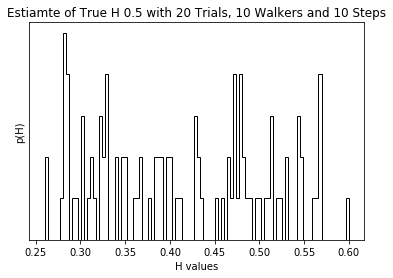

In [6]:
PlotMC(20,.5,10,10)

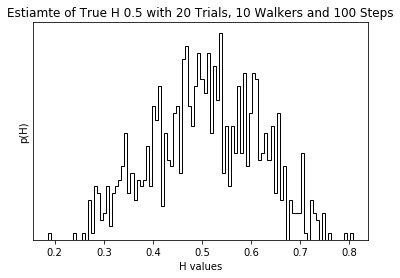

In [7]:
PlotMC(20,.5,10,100)

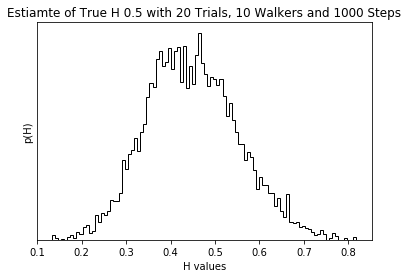

In [8]:
PlotMC(20,.5,10,1000)

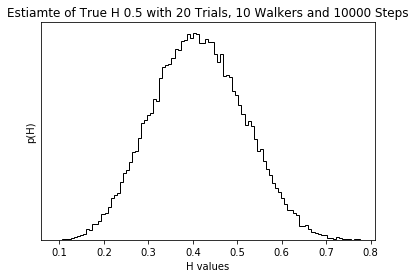

In [9]:
PlotMC(20,.5,10,10000)

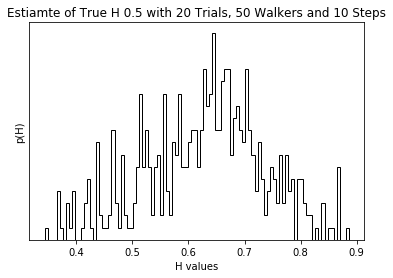

In [10]:
PlotMC(20,.5,50,10)

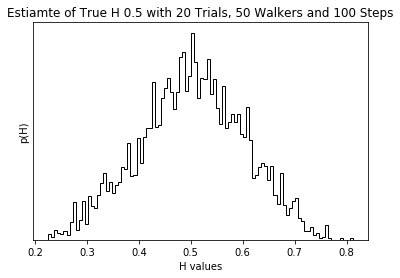

In [11]:
PlotMC(20,.5,50,100)

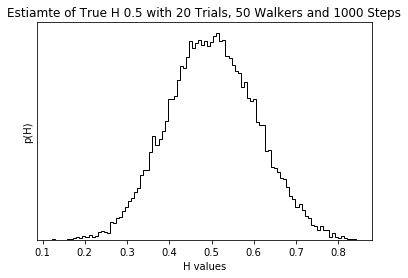

In [12]:
PlotMC(20,.5,50,1000)

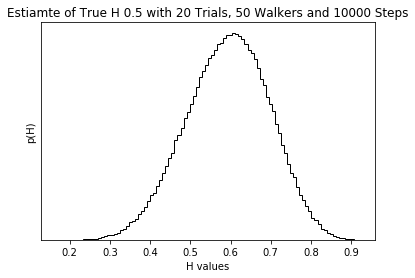

In [13]:
PlotMC(20,.5,50,10000)

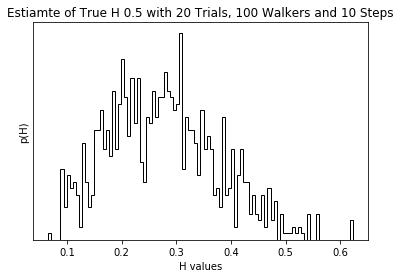

In [14]:
PlotMC(20,.5,100,10)

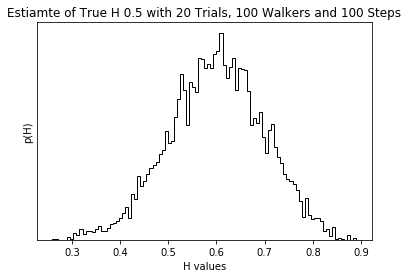

In [15]:
PlotMC(20,.5,100,100)

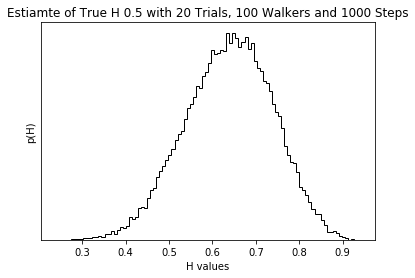

In [16]:
PlotMC(20,.5,100,1000)

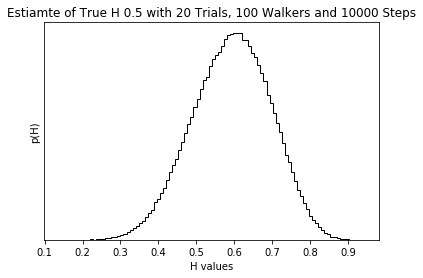

In [23]:
PlotMC(20,.5,100,10000)

As we can see, as chain length increases and as number of chains increases, the quality of the histogram inproves and the plot tends to converge.

Now lets test the effect of a gaussian prior

In [18]:
def lnGauss(H,b,w):
    G = -((H-b)**2)/(2*(w**2))-np.log(w)-(1/2)*np.log(2*np.pi)
    return G

lnGauss(1,2,3)

-2.073106377428338

In [30]:
def lnpostGpr(H,n,h,b,w):
    if 0 < H < 1:
        lnp = np.log(np.math.factorial(n))-np.log(np.math.factorial(h))\
        -np.log(np.math.factorial(n-h))+h*np.log(H)+(n-h)*np.log(1-H)
        G = -((H-b)**2)/(2*(w**2))-np.log(w)-(1/2)*np.log(2*np.pi)
        return lnp+G
    else:
        return -np.inf

In [31]:
lnpostGpr(.5,10,5,.5,1)

-2.3209812512927024

We will set h externally so that it does not affect the shape between plots, and the affect of the width and bias can be isolated

In [43]:
h_ = np.random.binomial(20,.5)
print(h_)

11


In [73]:
def PlotMCG(n,b,w,TrH,nwalkers,nsteps):
    ndim = 1
    p0 = np.random.rand(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpostGpr, args=[n,h_,b,w])
    state = sampler.run_mcmc(p0, 100)
    sampler.reset()
    sampler.run_mcmc(state, nsteps)
    samples = sampler.get_chain(flat=True)
    plt.hist(samples[:, 0], 100, color="k", histtype="step")
    plt.title('Estiamte of True H '+str(TrH)+' with Gaussian Prior with '+r'$\mu$ '+str(b)+r' and $\sigma$ '+str(w))
    plt.xlabel("H values")
    plt.ylabel("p(H)")
    plt.gca().set_yticks([])
    print('h = '+ str(h_))

h = 11


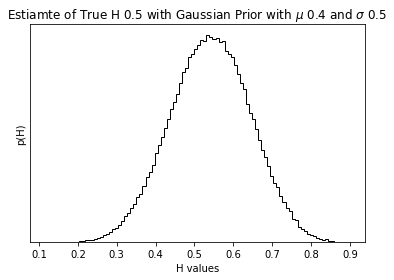

In [75]:
PlotMCG(20,.4,.5,.5,50,10000)

h = 11


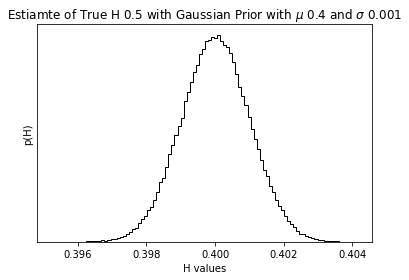

In [76]:
PlotMCG(20,.4,.001,.5,50,10000)

h = 11


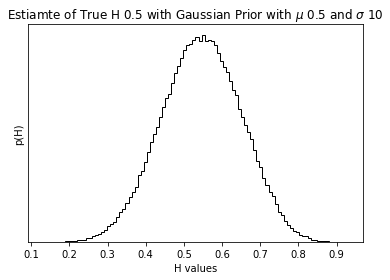

In [77]:
PlotMCG(20,.5,10,.5,50,10000)

h = 11


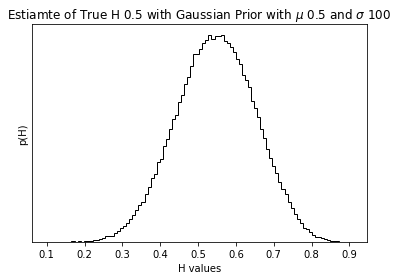

In [78]:
PlotMCG(20,.5,100,.5,50,10000)

We see that a small width will narrow the peak, but a large width will not have a noticable effect.

h = 11


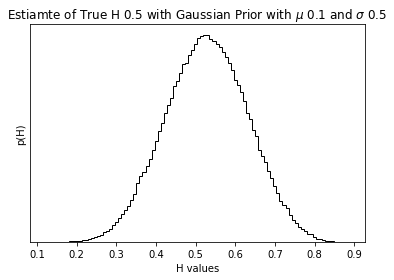

In [79]:
PlotMCG(20,.1,.5,.5,50,10000)

h = 11


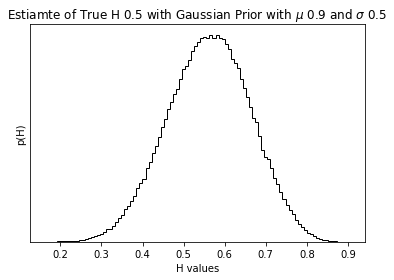

In [80]:
PlotMCG(20,.9,.5,.5,50,10000)

h = 11


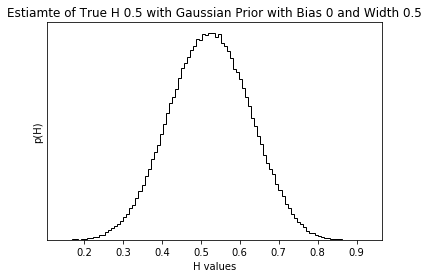

In [61]:
PlotMCG(20,0,.5,.5,50,10000)

h = 11


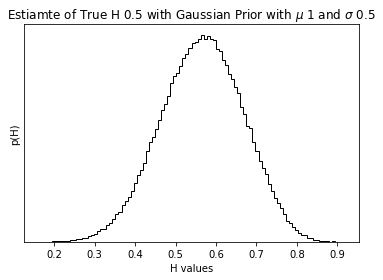

In [81]:
PlotMCG(20,1,.5,.5,50,10000)

h = 11


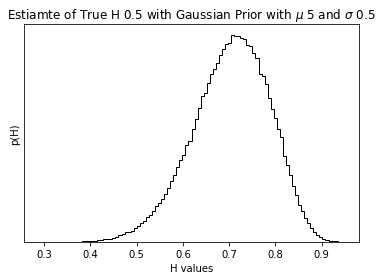

In [82]:
PlotMCG(20,5,.5,.5,50,10000)

h = 11


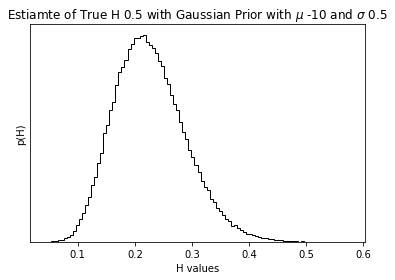

In [83]:
PlotMCG(20,-10,.5,.5,50,10000)

h = 11


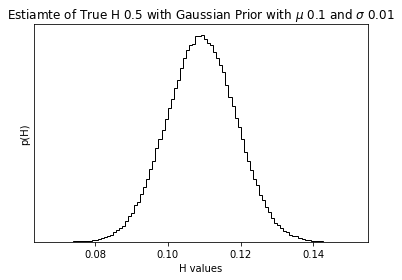

In [84]:
PlotMCG(20,.1,.01,.5,50,10000)

h = 11


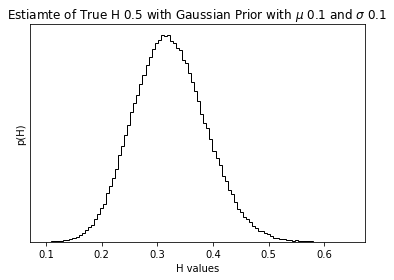

In [85]:
PlotMCG(20,.1,.1,.5,50,10000)

For small $\sigma$, $\mu$ has a much stronger effect. For large $\sigma$, $\mu$ has little effect as long as it is a reasonable guess, ie $0<\mu<1$

## Part 2

From the last assignment we know that 

$$prob(x_k|\alpha,\beta,I)=\frac{\beta}{\pi[\beta^2 + (x_k-\alpha)^2]}$$ 

$$prob(\{x_k\}|\alpha,\beta,I)=\prod_{k=1}^{N}prob(x_k|\alpha,\beta,I)$$

$$\log_e[prob(\{x_k\}|\alpha,\beta,I)]=Constant+N\log_e(\beta)-\prod_{k=1}^{N}\log_e[\beta^2 + (x_k-\alpha)^2]$$

In [343]:
def lighthouse(a,b,N): 
    angl=np.random.uniform(-np.pi/2,np.pi/2,N)
    xk = b*np.tan(angl)+a
    return xk
lh=np.asarray(lighthouse(1,1,1000))

In [362]:
def L2(ablist,l):
    a0,b0 = ablist
    if b0 > 0:
        l2=len(l)*np.log(b0)-np.sum(np.log(b0**2+(l-a0)**2))
    else:
        l2 = -np.inf
    return(l2)
    
def LhPlot(l,nwalkers,nsteps):
    ndim = 2
    p0 = np.random.rand(nwalkers, ndim)
    #blist = np.random.rand(ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, L2, args=[l])
    state = sampler.run_mcmc(p0, 100)
    sampler.reset()
    sampler.run_mcmc(state, nsteps)
    samples = sampler.get_chain(flat=True)
    import corner
    fig = corner.corner(samples, labels=[r"$\alpha$", r"$\beta$"],truths=[1, 1],show_titles=True);
    print(str(nwalkers)+' cahins with length '+str(nsteps))

Let's run this function for several different numbers of chains and chain lengths

10 cahins with length 100


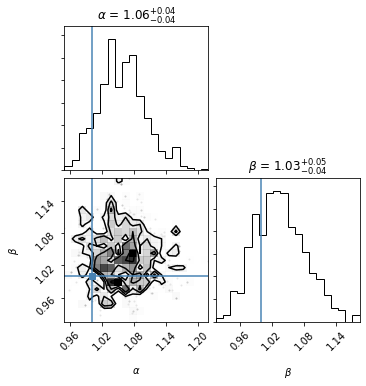

In [363]:
LhPlot(lh,10,100)

10 cahins with length 1000


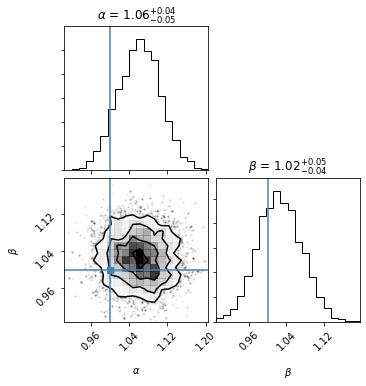

In [364]:
LhPlot(lh,10,1000)

10 cahins with length 10000


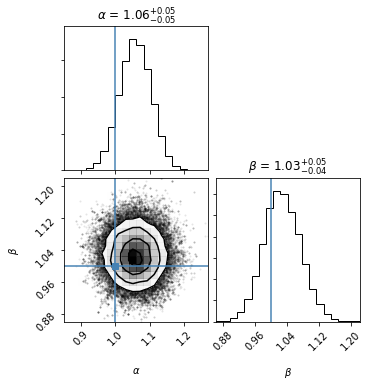

In [365]:
LhPlot(lh,10,10000)

50 cahins with length 10


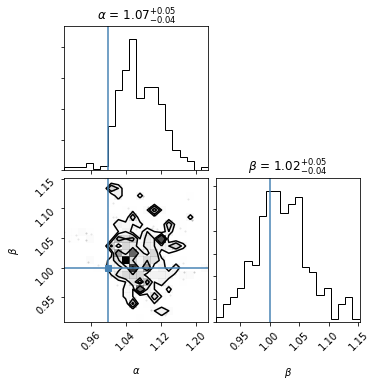

In [366]:
LhPlot(lh,50,10)

50 cahins with length 100


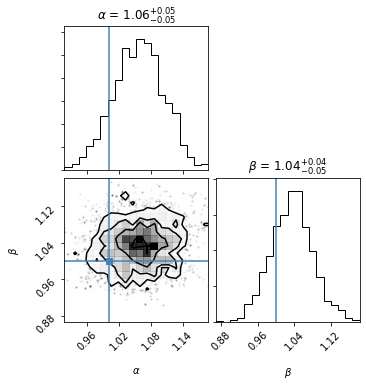

In [367]:
LhPlot(lh,50,100)

50 cahins with length 1000


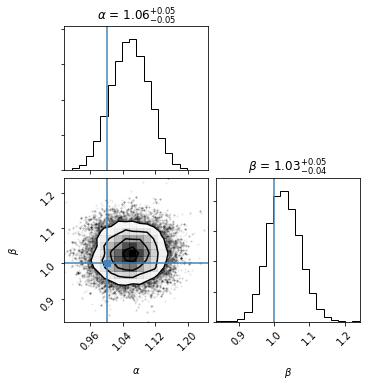

In [369]:
LhPlot(lh,50,1000)

50 cahins with length 10000


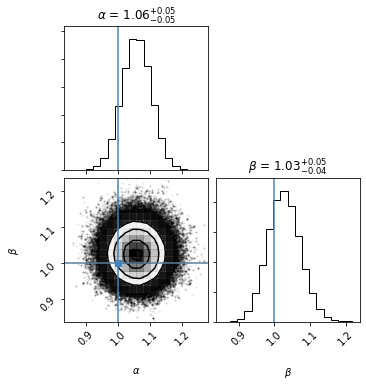

In [370]:
LhPlot(lh,50,10000)

100 cahins with length 10


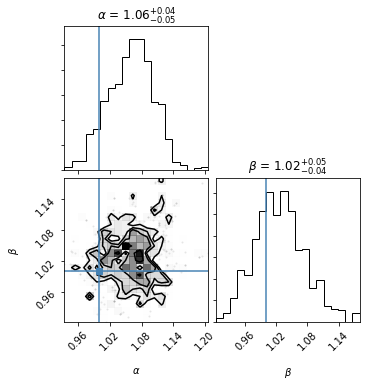

In [371]:
LhPlot(lh,100,10)

100 cahins with length 100


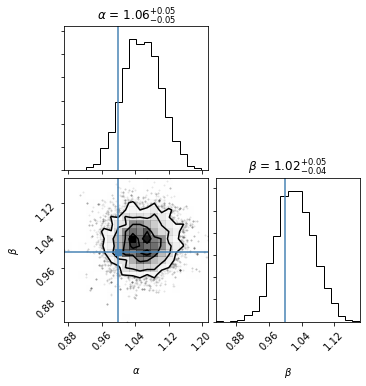

In [372]:
LhPlot(lh,100,100)

100 cahins with length 1000


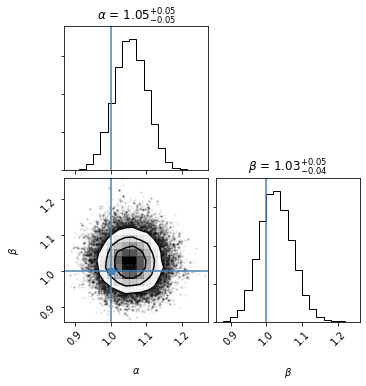

In [374]:
LhPlot(lh,100,1000)

100 cahins with length 10000


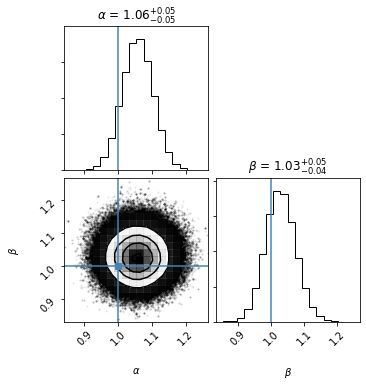

In [375]:
LhPlot(lh,100,10000)

In [506]:
def PP(l,nwalkers,nsteps):
    apoint = []
    bpoint = []
    for n in nsteps:
        ndim = 2
        p0 = np.random.rand(nwalkers, ndim)
        sampler = emcee.EnsembleSampler(nwalkers, ndim, L2, args=[l])
        state = sampler.run_mcmc(p0, 100)
        sampler.reset()
        sampler.run_mcmc(state, n)
        z = np.argmax(sampler.get_log_prob(flat=True))
        apoint.append(sampler.get_chain(flat=True)[z][0])
        bpoint.append(sampler.get_chain(flat=True)[z][1])
    
    fig = plt.figure(figsize = (10,3))
    fig.subplots_adjust(hspace = 0.3, wspace = 0.4)
    fig.suptitle(str(nwalkers)+' Chains')
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    a = fig.add_subplot(1,2,1)
    b = fig.add_subplot(1,2,2)
    a.plot(nsteps,apoint)
    b.plot(nsteps,bpoint)
    a.set_xlabel('n Steps')
    a.set_ylabel(r'Most Brobable Position of $\alpha$')
    a.set_title(r'$\alpha$')
    b.set_xlabel('n Steps')
    b.set_ylabel(r'Most Probable Position of $\beta$')
    b.set_title(r'$\beta$')
    

In [513]:
steps = (1,5,10,20,100,250,500,750,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000)

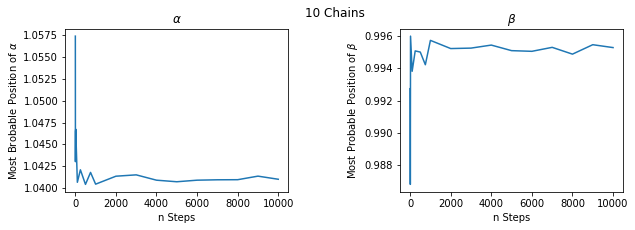

In [514]:
PP(lh,10,steps)

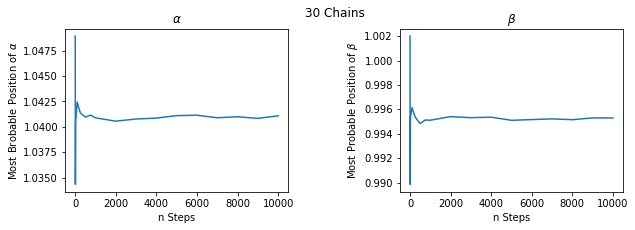

In [515]:
PP(lh,30,steps)

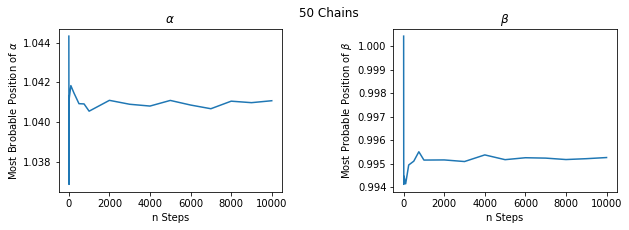

In [517]:
PP(lh,50,steps)

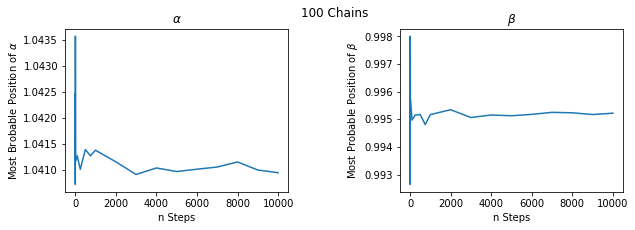

In [516]:
PP(lh,100,steps)

Lets test if the system can detect an inteloper. Assume the ship points its light directly at the shore.

In [415]:
lh1=np.asarray(lighthouse(1,1,1000))
sh=np.asarray(ship(.5,.5,100))
def ship(a,b,N): 
    angl=np.zeros(N)
    xk = b*np.tan(angl)+a
    return xk
comb=np.concatenate((lh1,sh), axis=0, out=None)

100 cahins with length 10000


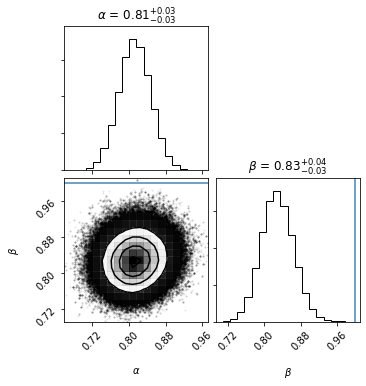

In [416]:
LhPlot(comb,100,10000)

MCMC cannot detect that there are 2 separate sources. There is still a single peak, it is just skewed towards the location of the ship.